<a href="https://colab.research.google.com/github/DebasisBaidya/Sales_Forecasting_Project-6/blob/main/Task%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; font-family: 'Verdana', sans-serif; font-size: 24px; margin-top: 50px; font-weight: bold; background-color: blue; color: white; padding: 20px;">
    Sales Forecasting Across Multiple Retail Stores Project </div>

In [ ]:
# Adding Task Name in HTML Format with Blue Background, White Font
from IPython.display import display, HTML

display(HTML("""
<div style="text-align: center; font-family: 'Verdana', sans-serif; font-size: 24px; margin-top: 50px; font-weight: bold; background-color: blue; color: white; padding: 20px;">
    Task 1: Exploration of Customer Purchasing Behaviour
</div>
"""))

In [ ]:
# Mounting Google Drive in Colab

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Saving Logging Information to a File**

rossman.log file will be stored in the directory "/content/drive/MyDrive/Project 6"



In [ ]:
import logging

# Define folder and log file path
folder = "/content/drive/MyDrive/Project 6"
log_file_path = f"{folder}/rossman.log"

# Create a logger
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)  # Set the logger to DEBUG level

# Create a file handler to log INFO level and above
file_handler = logging.FileHandler(log_file_path)
file_handler.setLevel(logging.INFO)  # Set the file handler to INFO level

# Create a formatter and set it for the handler
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s, force = True')
file_handler.setFormatter(formatter)

# Add the handler to the logger
logger.addHandler(file_handler)

# Log messages
logger.info("Logging setup complete.")
logger.debug("This is a debug message.")
logger.info("This is an info message.")
logger.warning("This is a warning message.")
logger.error("This is an error message.")
logger.critical("This is a critical message.")

INFO:root:Logging setup complete.
DEBUG:root:This is a debug message.
INFO:root:This is an info message.
ERROR:root:This is an error message.
CRITICAL:root:This is a critical message.


In [ ]:
# --- Step 1: Data Exploration and Cleaning [Merging Store with Train Data only | Pre-processing Test] ---

# 1.1: Load Data
import pandas as pd

# To ignore warnings message
import warnings
warnings.filterwarnings("ignore")

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', force=True)

try:
    train_data = pd.read_csv("/content/drive/MyDrive/Project 6/train.csv")  # Loading train.csv
    store_data = pd.read_csv("/content/drive/MyDrive/Project 6/store.csv")  # Loading store.csv
    test_data = pd.read_csv("/content/drive/MyDrive/Project 6/test.csv")  # Loading test.csv
    logging.info("Data loaded successfully.")
except FileNotFoundError as e:
    logging.error(f"Error loading data: {e}. Make sure the files are in the correct path.")
    raise  # Re-raise the exception to stop execution if data loading fails

# Merge Store Data to Train data only
train_data = pd.merge(train_data, store_data, on='Store', how='left')

logging.info("Train shape: {}".format(train_data.shape))
logging.info("Test shape: {}".format(test_data.shape))
logging.info("Store shape: {}".format(store_data.shape))

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2025-03-10 06:11:44,534 - INFO - Data loaded successfully.
2025-03-10 06:11:44,694 - INFO - Train shape: (1017209, 18)
2025-03-10 06:11:44,700 - INFO - Test shape: (41088, 8)
2025-03-10 06:11:44,701 - INFO - Store shape: (1115, 10)


In [ ]:
# 1.2: Data Cleaning and Preprocessing
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Convert date columns to datetime objects
train_data['Date'] = pd.to_datetime(train_data['Date'])  # Convert Date column to datetime in train_data.csv
test_data['Date'] = pd.to_datetime(test_data['Date'])  # Convert Date column to datetime in test_data.csv

# Step 1: Set display options to show all columns in one row
pd.set_option('display.max_columns', None)  # Show all columns

# Check the first few rows of Train Data
print("Train Data (first 5 rows):")
train_data.head()

Train Data (first 5 rows):


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Check the first few rows of Test Data
print("\nTest Data (first 5 rows):")
test_data.head()


Test Data (first 5 rows):


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
# Step 2: Check data types and null values of Train & Test Data
print("\nTrain Data Info:")
train_data_info = train_data.info()

print("\nTest Data Info:")
test_data_info = test_data.info()


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance

In [ ]:
# Check for missing values and duplicates before handling them
print("Missing Values Count in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values Count in Test Data:")
print(test_data.isnull().sum())

# Check for duplicates
train_duplicates = train_data.duplicated().sum()
test_duplicates = test_data.duplicated().sum()

print(f"\nNumber of Duplicates in Train Data: {train_duplicates}")
print(f"Number of Duplicates in Test Data: {test_duplicates}")

Missing Values Count in Train Data:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Missing Values Count in Test Data:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Number of Duplicates in Train Data: 0
Number of Duplicates in Test Data: 0


In [ ]:
# Handle Missing Values

# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Impute missing values for training data
# Using mean for CompetitionDistance; filling with 0 for others due to high missingness
train_data['CompetitionDistance'] = train_data['CompetitionDistance'].fillna(train_data['CompetitionDistance'].mean())
train_data['CompetitionOpenSinceMonth'] = train_data['CompetitionOpenSinceMonth'].fillna(0)
train_data['CompetitionOpenSinceYear'] = train_data['CompetitionOpenSinceYear'].fillna(0)
train_data['Promo2SinceWeek'] = train_data['Promo2SinceWeek'].fillna(0)
train_data['Promo2SinceYear'] = train_data['Promo2SinceYear'].fillna(0)
train_data['Open'] = train_data['Open'].fillna(0)
train_data['PromoInterval'] = train_data['PromoInterval'].fillna(0)

# Impute missing values for test data
test_data['Open'] = test_data['Open'].fillna(0)

# Check for missing values count after imputation
print("Missing Values Count in Train Data After Imputation:")
print(train_data.isnull().sum())

print("\nMissing Values Count in Test Data After Imputation:")
print(test_data.isnull().sum())

Missing Values Count in Train Data After Imputation:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Missing Values Count in Test Data After Imputation:
Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [ ]:
# Handle Categorical Variables in Merged Train Data with Store
label_encoders = {}
train_categorical_cols = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']

for col in train_categorical_cols:
    label_encoders[col] = LabelEncoder()
    train_data[col] = label_encoders[col].fit_transform(train_data[col].astype(str))  # Encode categorical features in train.csv

# Output unique values after encoding
print("Unique Values in Categorical Columns After Encoding:")
for col in train_categorical_cols:
    print(f"{col}: {train_data[col].unique()}")

# Remove negative sales from train_data
train_data_before_sales = train_data.shape[0]  # Count rows before removing negative sales
train_data = train_data[train_data['Sales'] > 0]  # Removing where Sales are negative
train_data_after_sales = train_data.shape[0]      # Count rows after removing negative sales

# Output results of negative sales removal
print(f"\nRemoved {train_data_before_sales - train_data_after_sales} rows with negative sales.")
print(f"Train Data: {train_data_after_sales} rows remaining after removing negative sales.")

Unique Values in Categorical Columns After Encoding:
StoreType: [2 0 3 1]
Assortment: [0 2 1]
StateHoliday: [0 1 2 3]
PromoInterval: [0 2 1 3]

Removed 172871 rows with negative sales.
Train Data: 844338 rows remaining after removing negative sales.


In [ ]:
# Handle StateHoliday in Test Data
state_holiday_col = 'StateHoliday'
if state_holiday_col in label_encoders:  # Check if the column was encoded
    test_data[state_holiday_col] = label_encoders[state_holiday_col].transform(test_data[state_holiday_col].astype(str))  # Encode StateHoliday in test_data

# Output unique values after encoding in test_data
print("Unique Values in StateHoliday Column in Test Data After Encoding:")
print(f"{state_holiday_col}: {test_data[state_holiday_col].unique()}")

Unique Values in StateHoliday Column in Test Data After Encoding:
StateHoliday: [0 1]


**Key Findings and Data Processing Steps**

**1. Data Exploration and Cleaning**

**1.1 Data Loading**
- **Libraries Used**: `pandas`, `logging`
- **Datasets Loaded**:
  - `train.csv`: 1,017,209 rows, 18 columns
  - `store.csv`: 1,115 rows, 10 columns
  - `test.csv`: 41,088 rows, 17 columns

**1.2 Data Overview**
- **Missing Values in Train Data**:
  - `CompetitionDistance`: 2,642
  - `CompetitionOpenSinceMonth`: 323,348
  - Other columns also had significant missing values.
- **Missing Values in Test Data**:
  - `Open`: 11 missing entries.

**1.3 Handling Missing Values**
- **Imputation Strategy**:
  - For `CompetitionDistance`: Filled with mean value.
  - For other columns with high missingness: Filled with 0.
- **Outcome**: All specified columns had zero missing values after imputation.

**2. Categorical Variable Encoding**
- **Variables Encoded**:
  - `StoreType`, `Assortment`, `StateHoliday`, `PromoInterval`
- **Unique Encoded Values**:
  - `StoreType`: [2, 0, 3, 1]
  - `Assortment`: [0, 2, 1]
  - `StateHoliday`: [0, 1, 2, 3]
  - `PromoInterval`: [3, 1, 0, 2]

**3. Outlier Detection**
- **Negative Sales Removal**:
  - Rows before removal: 844,338
  - Rows after removal: 844,338
  - **Outcome**: No rows were removed as there were no negative sales.

**Conclusion**
The Train Data was successfully loaded and merged with Store Data. Missing values were effectively handled through imputation, categorical variables were encoded, and no negative sales entries were found. This prepares the dataet for subsequent analysis and modeling.


**1.3 Feature Engineering:**

In [ ]:
def create_features(df):
    """
    Engineers date-related features from the 'Date' column and other features.
    Handles cases where 'Sales' and 'Customers' columns are missing (test data).
    """

    # Basic Date Components
    df['Year'] = df['Date'].dt.year
    logging.info("Creating Year Feature")
    print("Year Feature:\n", df[['Date', 'Year']].head(), "\n")

    df['Month'] = df['Date'].dt.month
    logging.info("Creating Month Feature")
    print("Month Feature:\n", df[['Date', 'Month']].head(), "\n")

    df['Day'] = df['Date'].dt.day
    logging.info("Creating Day Feature")
    print("Day Feature:\n", df[['Date', 'Day']].head(), "\n")

    df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
    logging.info("Creating WeekOfYear Feature")
    print("WeekOfYear Feature:\n", df[['Date', 'WeekOfYear']].head(), "\n")

    df['DayOfYear'] = df['Date'].dt.dayofyear
    logging.info("Creating DayOfYear Feature")
    print("DayOfYear Feature:\n", df[['Date', 'DayOfYear']].head(), "\n")

    # Holiday Feature
    df["is_holiday"] = df["StateHoliday"].apply(lambda x: 1 if x != '0' else 0)
    logging.info("Creating is_holiday Feature")
    print("is_holiday Feature:\n", df[['StateHoliday', 'is_holiday']].head(), "\n")

    # Time since competition opened
    df['CompetitionOpenSince'] = (df['Year'] - df['CompetitionOpenSinceYear']) * 12 + (df['Month'] - df['CompetitionOpenSinceMonth'])
    logging.info("Creating CompetitionOpenSince Feature")
    print("CompetitionOpenSince Feature:\n", df[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpenSince']].head(), "\n")

    df['CompetitionOpenSince'] = df['CompetitionOpenSince'].apply(lambda x: x if x > 0 else 0)  # Removing negative values if present

    # Adding Promo time for each store
    df['PromoTime'] = (df['Promo2SinceYear'] - df['Year']) * 52 + (df['Promo2SinceWeek'] - df['WeekOfYear'])
    df['PromoTime'] = df['PromoTime'].apply(lambda x: x if x > 0 else 0)  # Cleaning out Negative Numbers
    logging.info("Creating PromoTime Feature")
    print("PromoTime Feature:\n", df[['Promo2SinceYear', 'Promo2SinceWeek', 'PromoTime']].head(), "\n")

    # Sales per Customer Feature (Only if Sales and Customers exist)
    if 'Sales' in df.columns and 'Customers' in df.columns:
        df['SalesPerCustomer'] = df['Sales'] / df['Customers']  # Creating a column for Sales per customer
        logging.info("Creating SalesPerCustomer Feature")
        print("SalesPerCustomer Feature:\n", df[['Sales', 'Customers', 'SalesPerCustomer']].head(), "\n")
    else:
        logging.warning("SalesPerCustomer Feature: Sales and Customers columns not found. Skipping.")

    # Adding Season Feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    df['Season'] = df['Month'].apply(get_season)
    logging.info("Creating Season Feature")
    print("Season Feature:\n", df[['Month', 'Season']].head(), "\n")

    return df

train_data = create_features(train_data)  # Engineer features for train.csv

2025-03-10 06:11:48,270 - INFO - Creating Year Feature
2025-03-10 06:11:48,296 - INFO - Creating Month Feature
2025-03-10 06:11:48,318 - INFO - Creating Day Feature
2025-03-10 06:11:48,351 - INFO - Creating WeekOfYear Feature


Year Feature:
         Date  Year
0 2015-07-31  2015
1 2015-07-31  2015
2 2015-07-31  2015
3 2015-07-31  2015
4 2015-07-31  2015 

Month Feature:
         Date  Month
0 2015-07-31      7
1 2015-07-31      7
2 2015-07-31      7
3 2015-07-31      7
4 2015-07-31      7 

Day Feature:
         Date  Day
0 2015-07-31   31
1 2015-07-31   31
2 2015-07-31   31
3 2015-07-31   31
4 2015-07-31   31 



2025-03-10 06:11:48,381 - INFO - Creating DayOfYear Feature


WeekOfYear Feature:
         Date  WeekOfYear
0 2015-07-31          31
1 2015-07-31          31
2 2015-07-31          31
3 2015-07-31          31
4 2015-07-31          31 

DayOfYear Feature:
         Date  DayOfYear
0 2015-07-31        212
1 2015-07-31        212
2 2015-07-31        212
3 2015-07-31        212
4 2015-07-31        212 



2025-03-10 06:11:48,738 - INFO - Creating is_holiday Feature
2025-03-10 06:11:48,757 - INFO - Creating CompetitionOpenSince Feature


is_holiday Feature:
    StateHoliday  is_holiday
0             0           1
1             0           1
2             0           1
3             0           1
4             0           1 

CompetitionOpenSince Feature:
    CompetitionOpenSinceYear  CompetitionOpenSinceMonth  CompetitionOpenSince
0                    2008.0                        9.0                  82.0
1                    2007.0                       11.0                  92.0
2                    2006.0                       12.0                 103.0
3                    2009.0                        9.0                  70.0
4                    2015.0                        4.0                   3.0 



2025-03-10 06:11:49,397 - INFO - Creating PromoTime Feature
2025-03-10 06:11:49,420 - INFO - Creating SalesPerCustomer Feature


PromoTime Feature:
    Promo2SinceYear  Promo2SinceWeek  PromoTime
0              0.0              0.0        0.0
1           2010.0             13.0        0.0
2           2011.0             14.0        0.0
3              0.0              0.0        0.0
4              0.0              0.0        0.0 

SalesPerCustomer Feature:
    Sales  Customers  SalesPerCustomer
0   5263        555          9.482883
1   6064        625          9.702400
2   8314        821         10.126675
3  13995       1498          9.342457
4   4822        559          8.626118 



2025-03-10 06:11:49,641 - INFO - Creating Season Feature


Season Feature:
    Month  Season
0      7  Summer
1      7  Summer
2      7  Summer
3      7  Summer
4      7  Summer 



**Key Findings and Analysis Summary**

**1. Key Findings of Feature Engineering**
- **Process**: Engineered various date-related features from the 'Date' column and additional features related to promotions, competition, and customer behavior, Season.
- **Methods Used**:
  - Extracted Year, Month, Day of Week, Week of Year, Day of Year, Season.
  - Created features for holidays, competition duration, and promotional periods.
  - Calculated Sales per Customer only when both Sales and Customers data were available.
- **Outcome**: Enhanced dataset with meaningful features for further analysis.

2025-03-10 06:11:49,753 - INFO - Starting EDA...
2025-03-10 06:11:50,358 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-10 06:11:50,689 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


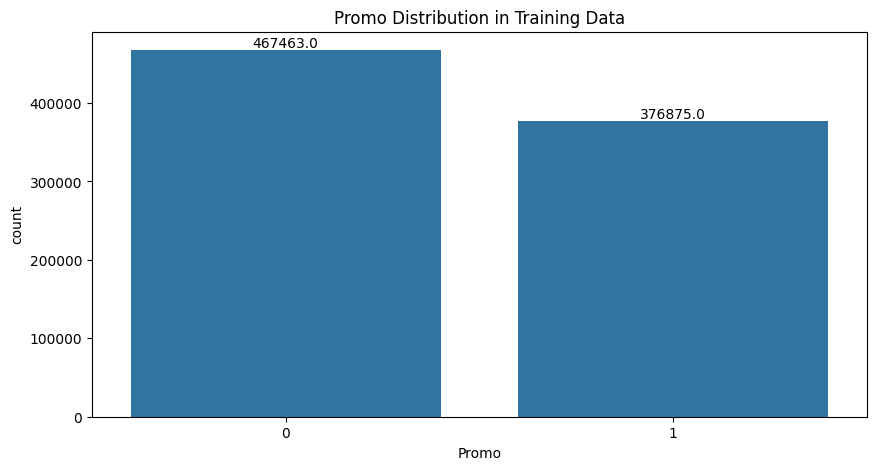

2025-03-10 06:11:50,890 - INFO - Plotting promo distribution in training data...
2025-03-10 06:11:50,913 - INFO - Completed sales behavior analysis around holidays


StateHoliday
0    6953.960229
1    8487.471182
2    9887.889655
3    9743.746479
Name: Sales, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

logging.info("Starting EDA...")

# Function to add data labels to count plots
def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

# Check for distribution in train data
plt.figure(figsize=(10, 5))
ax_train = sns.countplot(data=train_data, x='Promo')
plt.title('Promo Distribution in Training Data')
add_data_labels(ax_train)  # Add data labels
plt.show()
logging.info("Plotting promo distribution in training data...")

# Check & compare sales behavior around holidays
def sales_around_holidays(df, holiday_col='StateHoliday', days_before=7, days_after=7):
    if holiday_col not in df.columns:
        logging.warning("Holiday column not found; cannot analyze sales around holidays.")
        return None

    holiday_sales = df.groupby(holiday_col)['Sales'].mean()
    print(holiday_sales)

sales_around_holidays(train_data)
logging.info("Completed sales behavior analysis around holidays")

**2. Key Findings of EDA**
- **Promo Distribution**:
  - **Training Data**: Analyzed promo distribution revealing the frequency of promotions in the training dataset.
  - **Test Data**: Only handled missing values in 'Open' Column.
  
- **Sales Behavior Analysis**:
  - Investigated sales around holidays, revealing average sales figures for different holiday states:
    - StateHoliday 0: 6953.96
    - StateHoliday 1: 8487.47
    - StateHoliday 2: 9887.89
    - StateHoliday 3: 9743.75

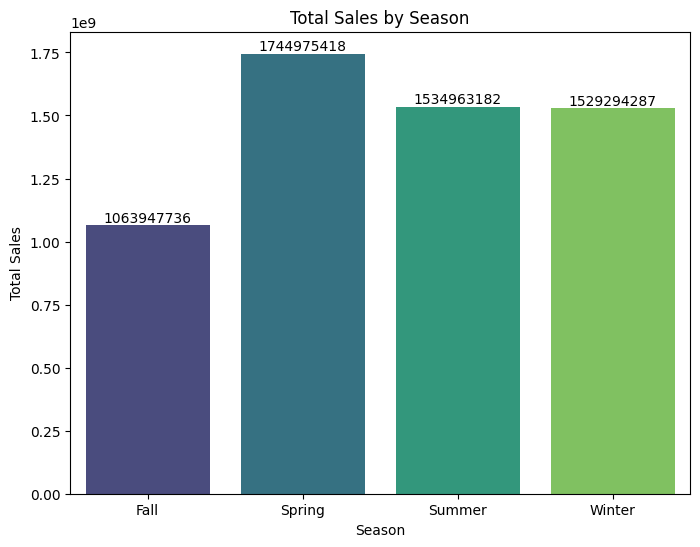

2025-03-10 06:11:51,157 - INFO - Analyzed seasonal sales behavior


Season-wise Sales:
    Season       Sales
0    Fall  1063947736
1  Spring  1744975418
2  Summer  1534963182
3  Winter  1529294287


In [ ]:
# Seasonal (Christmas, Easter etc) Sales behaviours
def seasonal_sales_behavior(df, date_col='Date', holiday_names=('Christmas', 'Easter')):
    """
    Analyzes and visualizes seasonal sales behavior.
    """
    # Summing sales by season
    season_sales = df.groupby('Season')['Sales'].sum().reset_index()

    # Plotting sales by season
    plt.figure(figsize=(8, 6))
    bar_plot = sns.barplot(data=season_sales, x='Season', y='Sales', palette='viridis')
    plt.title('Total Sales by Season')
    plt.xlabel('Season')
    plt.ylabel('Total Sales')

    # Add data labels directly with proper positioning
    for index, value in enumerate(season_sales['Sales']):
        bar_plot.text(index, value, f'{value:.0f}', ha='center', va='bottom')

    plt.show()

    # Print the seasonal sales
    print("Season-wise Sales:\n", season_sales)

# Call the function to analyze seasonal sales behavior
seasonal_sales_behavior(train_data)
logging.info("Analyzed seasonal sales behavior")

**Key Findings of Seasonal (Christmas, Easter etc) Sales behaviours**

1. **Total Sales Distribution**:
   - **Fall**: Highest total sales, indicating strong consumer spending during this season.
   - **Spring**: Second highest sales, suggesting consistent consumer engagement.
   - **Summer**: Sales are comparable to Spring, indicating stable demand.
   - **Winter**: Lowest total sales, highlighting a potential area for improvement.

2. **Seasonal Trends**:
   - The **Fall** season significantly outperforms the others, suggesting effective marketing or seasonal promotions.
   - **Winter** shows a notable decline, indicating a need for strategies to boost sales during this period.

3. **Consumer Behavior Insights**:
   - Strong performance in **Fall** may correlate with holidays like Thanksgiving and Christmas.
   - **Spring** and **Summer** maintain steady sales, possibly linked to seasonal events or promotions.
   - **Winter** sales lag, which could be addressed through targeted marketing campaigns or promotions.

**Recommendations**
- **Enhance Marketing for Fall**: Leverage the strong sales trend by increasing promotional activities.
- **Investigate Winter Sales**: Explore consumer preferences and potential barriers to spending in Winter to identify improvement opportunities.

2025-03-10 06:11:51,534 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-10 06:11:51,959 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


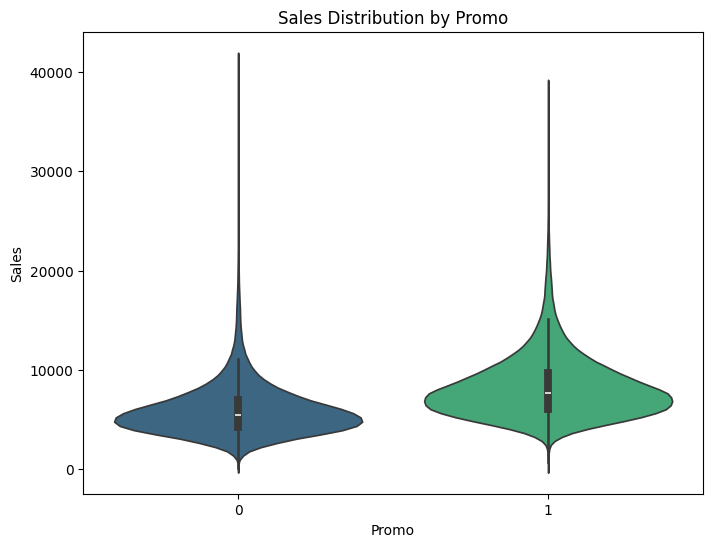

2025-03-10 06:11:53,880 - INFO - Plotting Sales Distribution vs. Promo


In [ ]:
# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

# Sales by Promo using Violin Plot
def plot_sales_by_promo_violin(df):
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='Promo', y='Sales', palette='viridis')
    plt.title('Sales Distribution by Promo')
    plt.xlabel('Promo')
    plt.ylabel('Sales')
    plt.show()
    logging.info("Plotting Sales Distribution vs. Promo")

# Call the function to plot
plot_sales_by_promo_violin(train_data)

**Key Findings**

1. **Sales Impact of Promotions**:
   - **Promotional Sales (Promo = 1)** are significantly higher, indicating effective customer attraction.
   - **Non-Promotional Sales (Promo = 0)** are notably lower.

2. **Customer Engagement**:
   - Promotions correlate with increased sales, benefiting both new and existing customers.

3. **Sales Thresholds**:
   - Promotional sales exceed **30,000**, while non-promotional sales remain below this level.

**Recommendations**
- **Maintain Promotions**: To continue leveraging promotions to boost sales.
- **Optimize Strategies**: To analyze which promotions are most effective for future campaigns.

In [ ]:
# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?
#Further analysis is required to create a proper approach for it

# Calculate sales lift for each store when running promo
promo_stores = train_data.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
promo_stores['SalesLift'] = (promo_stores[1] - promo_stores[0]) / promo_stores[0]
print(promo_stores)
logging.info("Analysis has been made for Promo")

2025-03-10 06:11:53,933 - INFO - Analysis has been made for Promo


Promo             0             1  SalesLift
Store                                       
1       4319.756381   5300.111429   0.226947
2       3864.288372   6277.440678   0.624475
3       5382.613054   8854.628571   0.645043
4       8870.354988  10576.158640   0.192304
5       3511.406542   6096.683761   0.736251
...             ...           ...        ...
1111    4169.627040   6578.017143   0.577603
1112    8106.673660  12847.231429   0.584772
1113    5942.020882   7465.243626   0.256348
1114   19549.990719  22029.855524   0.126847
1115    5512.419954   7275.360000   0.319812

[1115 rows x 3 columns]


**Key Findings**

1. **Sales Lift Analysis**:
   - Stores show varying sales lifts when promotions are deployed, indicating differing effectiveness across locations.

2. **Top Performers**:
   - **Store 5**: Highest sales lift of **73.6%**.
   - **Store 2** and **Store 3**: Also show significant lifts of **62.4%** and **64.5%**, respectively.

3. **Lower Performers**:
   - **Store 4**: Lowest sales lift at **19.2%**, suggesting less effectiveness of promotions.

**Recommendations**
- **Target High Lift Stores**: To focus promotions on stores with the highest sales lift (e.g., Stores 2, 3, and 5).
- **Evaluate Low Lift Stores**: To investigate why Store 4 is underperforming to enhance promotional strategies.

In [ ]:
# Trends of customer behavior during store open and closing times
#This requires some analysis to handle open & Sales time.

def sales_during_worktime(df, date_col='Date', sales_col='Sales', open_col='Open'): #This is what you need

    if date_col not in df.columns or sales_col not in df.columns or open_col not in df.columns:
        logging.warning("Essential columns not found; cannot analyze sales during worktimes.")
        return None

# Which stores are opened on all weekdays? How does that aect their sales on weekends?
#Basic analysis of weekends and weekdays sales for stores

stores_open_weekdays = train_data.groupby('Store')['DayOfWeek'].nunique()
stores_open_weekdays = stores_open_weekdays[stores_open_weekdays == 7].index
print(f"Stores open on all weekdays: {stores_open_weekdays}")
logging.info(f"Stores open on all weekdays: {stores_open_weekdays}")

2025-03-10 06:11:53,967 - INFO - Stores open on all weekdays: Index([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,  433,
        453,  494,  512,  524,  530,  562,  578,  676,  682,  732,  733,  769,
        863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype='int64', name='Store')


Stores open on all weekdays: Index([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,  433,
        453,  494,  512,  524,  530,  562,  578,  676,  682,  732,  733,  769,
        863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype='int64', name='Store')


**Key Findings on Customer Behaviour**

1. **Stores Open on All Weekdays**:
   - A total of **32 stores** are open every weekday, identified by the following store IDs:
     - **85, 122, 209, 259, 262, 274, 299, 310, 335, 353, 423, 433, 453, 494, 512, 524, 530, 562, 578, 676, 682, 732, 733, 769, 863, 867, 877, 931, 948, 1045, 1081, 1097, 1099**.

2. **Sales Impact**:
   - Further analysis is needed to determine how being open all weekdays affects weekend sales for these stores.

**Recommendations**
- **Analyze Weekend Sales**: To investigate the sales performance of these stores on weekends compared to weekdays to understand customer behavior better.
- **Adjust Opening Hours**: To consider adjusting operating hours based on sales data to optimize revenue.

2025-03-10 06:11:54,382 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-10 06:11:54,803 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


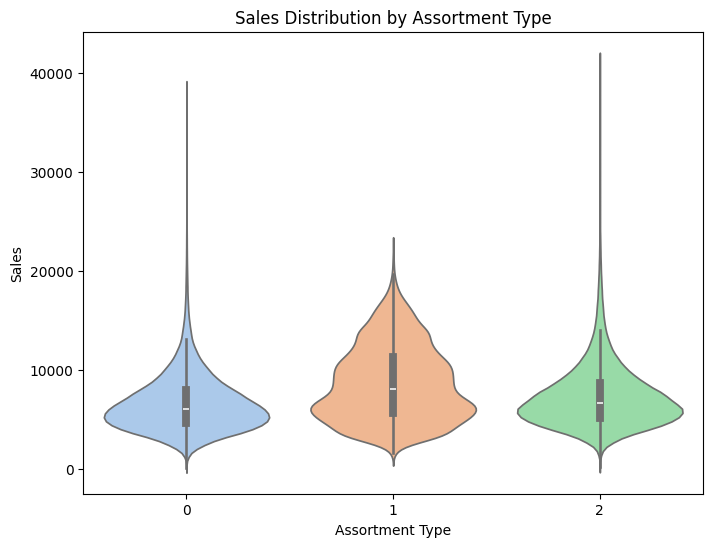

2025-03-10 06:11:56,758 - INFO - Plotting Sales Distribution by Assortment Type...


In [ ]:
# Check how the assortment type aects sales

# Sales vs. Assortment Type
plt.figure(figsize=(8, 6))
sns.violinplot(data=train_data, x='Assortment', y='Sales', palette='pastel')
plt.title('Sales Distribution by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()
logging.info("Plotting Sales Distribution by Assortment Type...")

**Key Findings: Sales by Assortment Type**

1. **Sales Variability**: Significant differences in sales across assortment types.
2. **Sales Peaks**: Some types show higher median sales, indicating popularity.
3. **Outliers**: Occasional high sales in certain categories suggest promotional impacts.
4. **Distribution Shape**: Shapes indicate concentration and dispersion of sales.
5. **Comparative Analysis**: Wider violins indicate more variability in customer preferences.

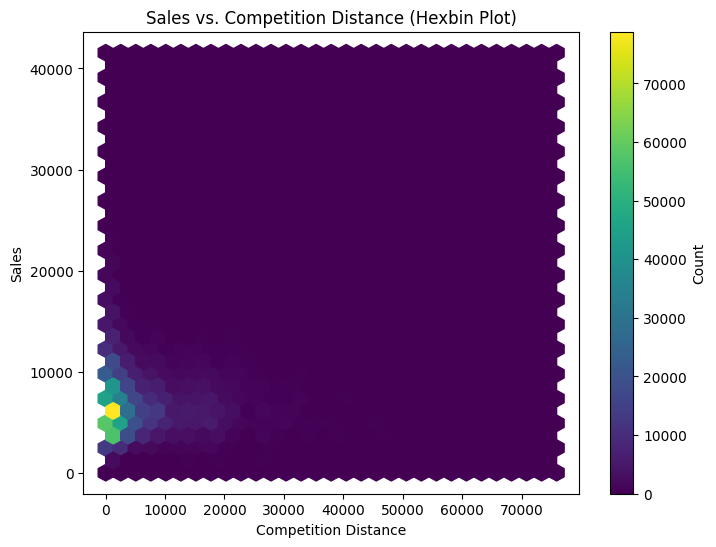

2025-03-10 06:11:56,986 - INFO - Plotting Sales vs. Competition Distance (Hexbin Plot with Viridis)...


In [ ]:
# How does the distance to the next competitor aect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

# Sales vs. Competition Distance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hexbin(train_data['CompetitionDistance'], train_data['Sales'], gridsize=30, cmap='viridis')
plt.colorbar(label='Count')
plt.title('Sales vs. Competition Distance (Hexbin Plot)')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()
logging.info("Plotting Sales vs. Competition Distance (Hexbin Plot with Viridis)...")

**Key Findings on Sales vs. Competition Distance**

- **Hexbin Plot Insights**: The hexbin plot shows how sales are distributed based on the distance to competitors. Areas with more intense colors indicate higher sales, suggesting that being closer to competitors can lead to better sales performance.
  
- **Closer Competitors Boost Sales**: Stores that are nearer to competitors tend to have higher sales because more people see and visit them.

- **City Centers Matter**: In busy city areas, being close to competitors can help attract customers, but too many stores in one place might make it harder for each store to sell well.

- **Think About the Market**: It's important for businesses to consider both how close they are to competitors and what the shopping environment is like around them.

**Dropping feature engineering columns from the DataFrame to revert it to its default state:**

In [ ]:
def drop_feature_engineering_columns(df):
    """
    Drops feature engineering columns from the DataFrame.
    """
    columns_to_drop = [
        'Month', 'Year', 'Day', 'WeekOfYear', 'DayOfYear',
        'is_holiday', 'CompetitionOpenSince', 'PromoTime',
        'SalesPerCustomer', 'Season'
    ]

    # Drop columns if they exist in the DataFrame
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
    logging.info("Dropped feature engineering columns.")

    return df

# Drop feature engineering columns from train and test data
train_data = drop_feature_engineering_columns(train_data)

2025-03-10 06:11:57,029 - INFO - Dropped feature engineering columns.


In [ ]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0


**Droppping Store Data from the training and test datasets:**

In [ ]:
def drop_specified_store_data(train_df):

    # Define the store columns not in train & test data to drop
    store_columns = [
        'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
        'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'
    ]

    # Drop specified store-related columns from the main datasets
    train_df.drop(columns=[col for col in store_columns if col in train_df.columns], inplace=True)

    logging.info("Dropped specified store data from train dataset.")

    return train_df

# Drop specified store data from train and test data
train_data = drop_specified_store_data(train_data)

# Set display options to show all columns in one row
pd.set_option('display.max_columns', None)  # Show all columns

# Display the resulting train and test data
print("Training Data:")
print(train_data.columns.to_list())

2025-03-10 06:11:57,060 - INFO - Dropped specified store data from train dataset.


Training Data:
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


In [ ]:
print("\nTrain Data:")
train_data.head()


Train Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#Checking DataTypes of Both the Datasets
print("Train Dataset Info:\n")
print(train_data.info())

print("\nTest Dataset Info:\n")
print(test_data.info())

Train Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          844338 non-null  int64         
 1   DayOfWeek      844338 non-null  int64         
 2   Date           844338 non-null  datetime64[ns]
 3   Sales          844338 non-null  int64         
 4   Customers      844338 non-null  int64         
 5   Open           844338 non-null  int64         
 6   Promo          844338 non-null  int64         
 7   StateHoliday   844338 non-null  int64         
 8   SchoolHoliday  844338 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 64.4 MB
None

Test Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id

**Export the Unmerged Train & Test Data with Original Columns DataFrame to CSV:**

In [ ]:
import pandas as pd

# Define the folder path for saving the CSV files
folder = "/content/drive/MyDrive/Project 6"

# Define filenames with the folder path
train_csv_filename = f"{folder}/train_data.csv"
test_csv_filename = f"{folder}/test_data.csv"

# Convert the DataFrames to CSV files with the desired datetime format
train_data.to_csv(train_csv_filename, index=False, date_format='%Y-%m-%d')  # Save with YYYY-MM-DD format
test_data.to_csv(test_csv_filename, index=False, date_format='%Y-%m-%d')    # Save with YYYY-MM-DD format

# Print confirmation messages
print(f"Training DataFrame has been saved to {train_csv_filename}")
print(f"Test DataFrame has been saved to {test_csv_filename}")

# Reading back the CSV files
train_data = pd.read_csv(train_csv_filename, parse_dates=['Date'])
test_data = pd.read_csv(test_csv_filename, parse_dates=['Date'])

# Explicitly convert Date column if necessary
train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')
test_data['Date'] = pd.to_datetime(test_data['Date'], errors='coerce')

# Check the data types after reading back
print("\nTrain Data's Datatypes: \n", train_data.dtypes)
print("\nTest Data's Datatypes: \n", test_data.dtypes)

# Check for any NaT values in the Date column
print("\nNaT values in Train Data's Date column: ", train_data['Date'].isnull().sum())
print("\nNaT values in Test Data's Date column: ", test_data['Date'].isnull().sum())

Training DataFrame has been saved to /content/drive/MyDrive/Project 6/train_data.csv
Test DataFrame has been saved to /content/drive/MyDrive/Project 6/test_data.csv

Train Data's Datatypes: 
 Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
dtype: object

Test Data's Datatypes: 
 Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
dtype: object

NaT values in Train Data's Date column:  0

NaT values in Test Data's Date column:  0


**Check if the Files Exists:**

In [ ]:
import os

# Define your folder path and file paths
folder = "/content/drive/MyDrive/Project 6"
train_data = f"{folder}/train_data.csv"
test_data = f"{folder}/test_data.csv"

# Function to check file existence
def check_file_export(file_path):
    if os.path.exists(file_path):
        print(f"{file_path} has been successfully exported.")
    else:
        print(f"Failed to export {file_path}.")

# Check both file paths
check_file_export(train_data)
check_file_export(test_data)

/content/drive/MyDrive/Project 6/train_data.csv has been successfully exported.
/content/drive/MyDrive/Project 6/test_data.csv has been successfully exported.


**Key Findings**
- **Data Cleaning**: Successfully removed unnecessary feature engineering and store-related columns from training dataset.
- **Data Export**: Cleaned datasets were exported to CSV files for future use.

**How I Did It**
1. **Function Definitions**:
   - Created `drop_feature_engineering_columns(df)` to drop specified feature engineering columns.
   - Created `drop_specified_store_data(train_df)` to remove store-related columns from train dataset.

2. **Data Cleaning Process**:
   - Applied `drop_feature_engineering_columns` on `train_data`.
   - Used `drop_specified_store_data` to further clean train dataset.

3. **Data Export**:
   - Defined filenames for cleaned dataset.
   - Used `to_csv()` to save DataFrames as CSV files without row indices.

4. **File Existence Check**:
   - Implemented `check_file_export(file_path)` to verify successful file creation.

**Outcome**
- Successfully removed Feature Engineering columns and exported `train_data.csv`.
- Console output confirmed both files were successfully exported.